In [1]:
import warnings
import logging
import itertools
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from docopt import docopt
import argparse
import sys
import matplotlib.pyplot as plt  # for visualization 
import seaborn as sns  # for coloring 
from sklearn.metrics import mean_squared_error

In [9]:
# set style of graphs
plt.style.use('ggplot')
from pylab import rcParams
plt.rcParams['figure.dpi'] = 100

In [13]:
hon = pd.read_csv('../stock/HON.csv', parse_dates=True, index_col='Date')
hon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03 00:00:00-05:00,111.783943,112.042725,110.758400,111.352638,98.629608,3155931
2017-01-04 00:00:00-05:00,111.793526,112.109818,111.208870,111.659348,98.901276,3069124
2017-01-05 00:00:00-05:00,111.688095,112.579453,111.390976,111.908539,99.121994,2766030
2017-01-06 00:00:00-05:00,112.081062,113.777519,111.668930,113.604996,100.624611,3770361
2017-01-09 00:00:00-05:00,113.355797,113.470810,112.665718,112.665718,99.792648,4030573


In [ ]:
X_train, X_test

In [7]:
today = hon.iloc[len(hon)-1:]

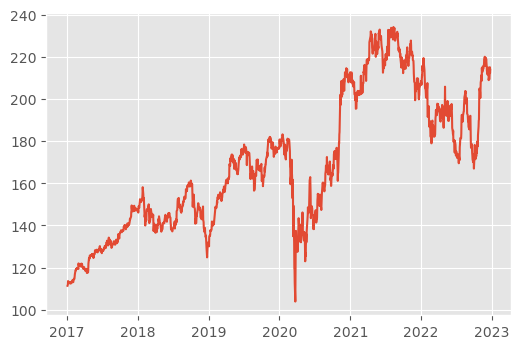

In [10]:
plt.plot(hon.index, hon['Close'])

In [2]:
from StockPredictorHMM import StockRegressorHMM

In [3]:
df = pd.read_csv('../stock/AAPL.csv')
X_train, X_test = train_test_split(df, test_size=0.02, shuffle=False)

In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1483,2022-11-22 00:00:00-05:00,148.130005,150.419998,146.929993,150.179993,150.179993,51804100
1484,2022-11-23 00:00:00-05:00,149.449997,151.830002,149.339996,151.070007,151.070007,58301400
1485,2022-11-25 00:00:00-05:00,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
1486,2022-11-28 00:00:00-05:00,145.139999,146.639999,143.380005,144.220001,144.220001,69246000
1487,2022-11-29 00:00:00-05:00,144.289993,144.809998,140.350006,141.169998,141.169998,83763800


In [5]:
stock_predictor = StockRegressorHMM()

In [7]:
stock_predictor.fit(X_train)

In [ ]:
y_test = np.array(X_test['Close'])
def evaluate(input, prediction):
    errors = abs(prediction - input)
    mape = 100 * np.mean(errors / input)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))